# Acute Lymphoblastic Leukemia (ALL) image classification using CNN

Group Name : L2BC    
  
Members:      
Amaan Geelani Syed - S2191704  
Ahmed Ibrahim Adem - S2173079

1. Importing dependencies 

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import cv2

2. Data Collection and Processing

        2.1 Importing and storing the jpg files

In [2]:
# importing all jpg files from all 4 folders
bengign_files = glob('./DataSet/Benign/*.jpg')
early_files = glob('./DataSet/Early/*.jpg')
pre_files = glob('./DataSet/Pre/*.jpg')
pro_files = glob('./DataSet/Pro/*.jpg')

# reading all images from all 4 lists using the openCV library
bengign_images = [cv2.imread(img) for img in bengign_files]
early_images = [cv2.imread(img) for img in early_files]
pre_images = [cv2.imread(img) for img in pre_files]
pro_images = [cv2.imread(img) for img in pro_files]


In [3]:
# all data is combined into one array and a label is assigned to each image
all_images = np.array(bengign_images + early_images + pre_images + pro_images)
all_labels = np.array([0]*len(bengign_images) + [1]*len(early_images) + [2]*len(pre_images) + [3]*len(pro_images))

        2.2 Displaying the unproccesed images

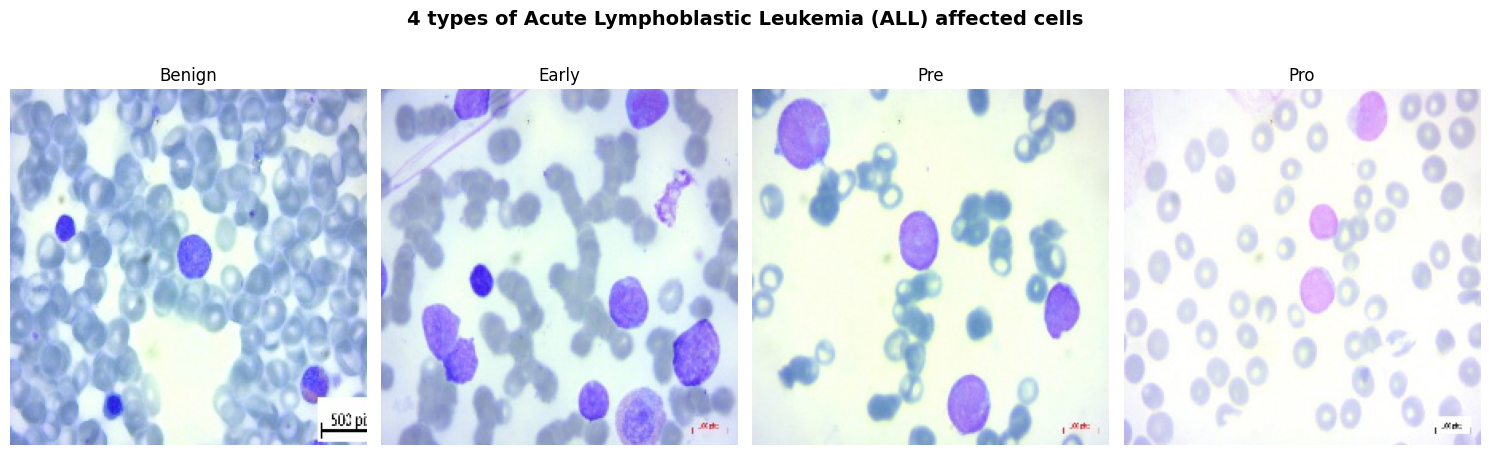

In [4]:

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
labels_list = ['Benign', 'Early', 'Pre', 'Pro']

for i, images_list in enumerate([bengign_images, early_images, pre_images, pro_images]):
    image = cv2.cvtColor(images_list[51], cv2.COLOR_BGR2RGB)
    label = labels_list[i]
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(label)

fig.suptitle("4 types of Acute Lymphoblastic Leukemia (ALL) affected cells", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

        2.3 Performing colour thresholding based Image Segmentation

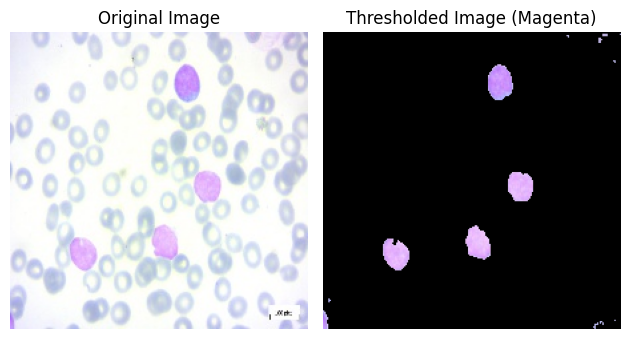

In [5]:
def image_segmentation(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    lower_magenta = np.array([120, 50, 50])
    upper_magenta = np.array([150, 255, 255])
    mask = cv2.inRange(hsv_image, lower_magenta, upper_magenta)

    thresholded_image = cv2.bitwise_and(image, image, mask=mask)
    thresholded_image = cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB)
    
    return thresholded_image


# displaying a random image
image = all_images[2601]
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_segmentation(image))
plt.title('Thresholded Image (Magenta)')
plt.axis('off')

plt.tight_layout()
plt.show()

# applying image segmentation to all images
all_images = np.array([image_segmentation(image) for image in all_images])


        2.4 Turning the images into binary images

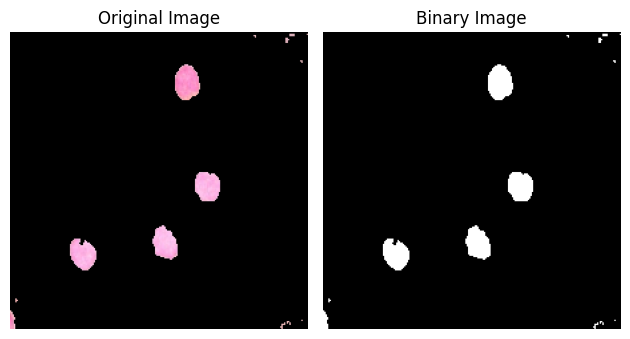

In [6]:

def binary_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    threshold_value = 0 
    max_value = 1
    _, binary_image = cv2.threshold(gray_image, threshold_value, max_value, cv2.THRESH_BINARY)
    
    return binary_image

image = all_images[2601]

# Displaying the original and binary images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image(image), cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.tight_layout()
plt.show()


all_images = np.array([binary_image(image) for image in all_images])



        2.5 Significantly improving dataset size

In [7]:
all_images_2 = np.array([cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) for image in all_images])
all_images_3 = np.array([cv2.rotate(image, cv2.ROTATE_180) for image in all_images])
all_images_4 = np.array([cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) for image in all_images])
all_images_5 = np.array([cv2.flip(image, 1) for image in all_images])   
all_images_6 = np.array([cv2.flip(image, 1) for image in all_images_2])
all_images_7 = np.array([cv2.flip(image, 1) for image in all_images_3])
all_images_8 = np.array([cv2.flip(image, 1) for image in all_images_4]) 

all_images = np.concatenate((all_images, all_images_2, all_images_3, all_images_4, all_images_5, all_images_6, all_images_7, all_images_8))
all_labels = np.concatenate((all_labels, all_labels, all_labels, all_labels, all_labels, all_labels, all_labels, all_labels))

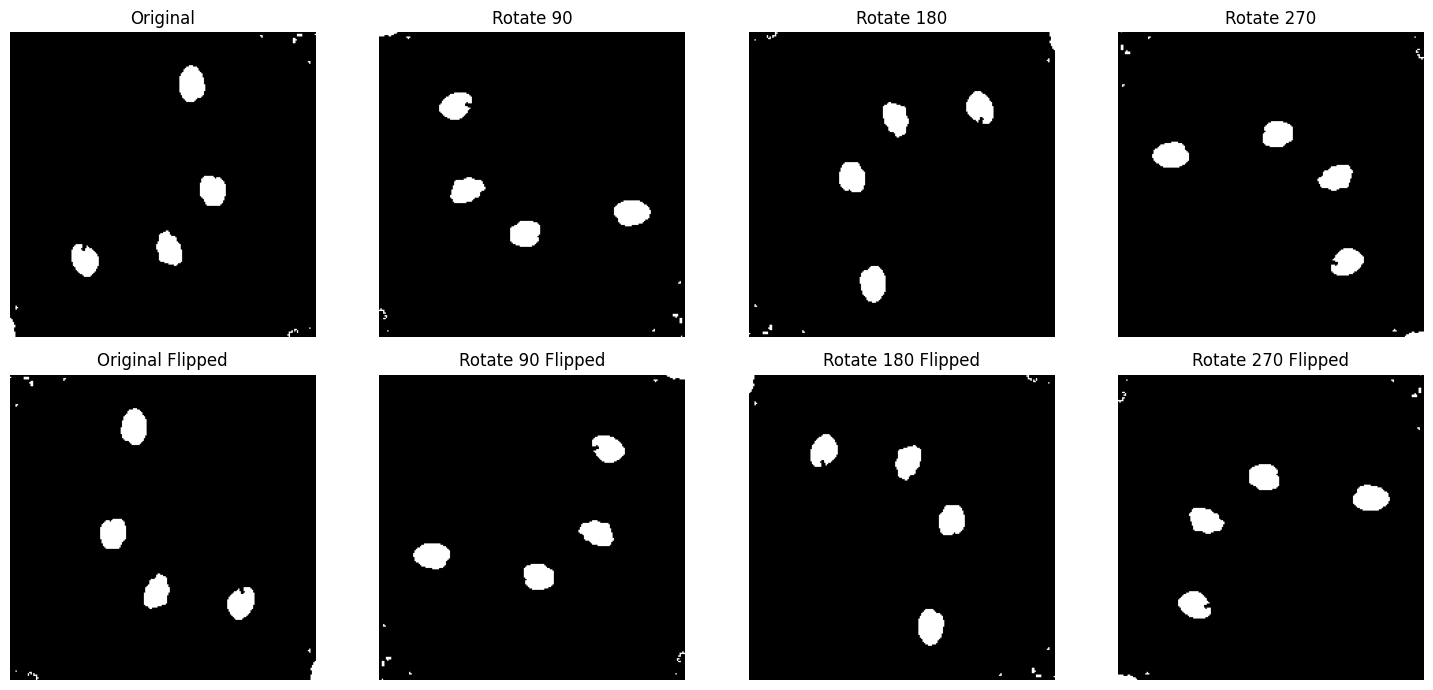

In [8]:

# Display the images for example
images = [all_images[2601], all_images_2[2601], all_images_3[2601], all_images_4[2601], all_images_5[2601], all_images_6[2601], all_images_7[2601], all_images_8[2601]]
fig, axs = plt.subplots(2, 4, figsize=(15, 7))

img_lbls = ['Original', 'Rotate 90', 'Rotate 180', 'Rotate 270','Original Flipped', 'Rotate 90 Flipped', 'Rotate 180 Flipped', 'Rotate 270 Flipped']

for i, ax in enumerate(axs.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(img_lbls[i])

plt.tight_layout()
plt.show()


3. Data Preprocessing 

        3.1 Fixing the dimesnsions of our dataset to fit out model

In [9]:
all_images = np.expand_dims(all_images, axis=3)
all_images.shape

(25904, 224, 224, 1)

        3.2 Spliting the data into train, validation and test

In [10]:
from sklearn.model_selection import train_test_split

# Spliting the data into training and temporary sets
training_images, temp_data, training_labels, temp_labels = train_test_split(
    all_images, 
    all_labels, 
    test_size=0.3,  # 70% of the data is training data
    random_state=42
)

# Spliting the temporary set into validation and testing sets
testing_images, validation_images, testing_labels, validation_labels = train_test_split(
    temp_data,
    temp_labels,
    test_size=0.5,  # 30% of the data is divided into validation and testing data equally
    random_state=42
)

4. Building CNN Model

        4.1 Imports and model selection

In [17]:
from keras import models, layers
model = models.Sequential()

        4.2 Adding Layers

In [18]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2 ,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2 ,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2 ,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

            4.2.1 Visualising the layers of your Convolutional Neural Network

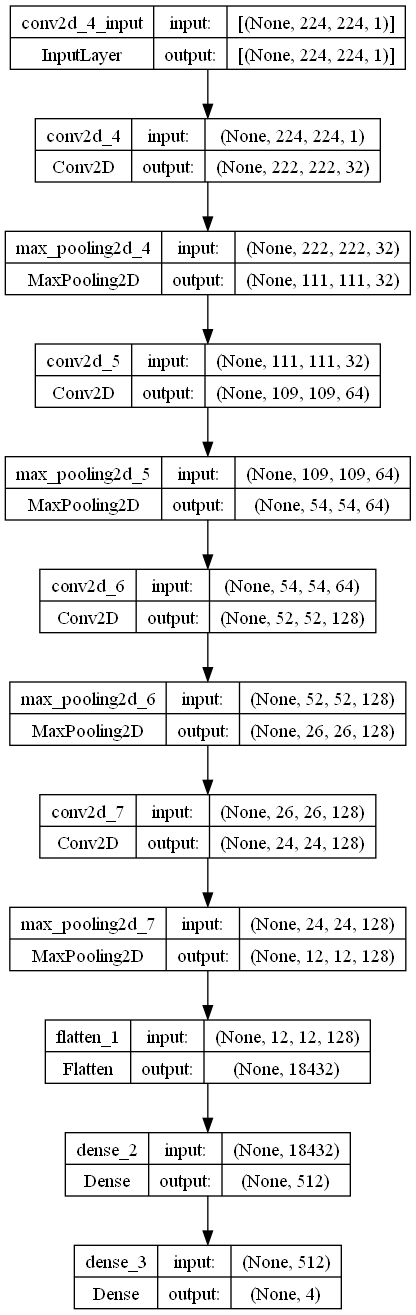

In [19]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

        4.2 Compiling the model with appropritate optimizers and the right loss functiion.

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        4.3 Training the model and saving for each epoch

In [137]:
import matplotlib.pyplot as plt

# Lists to store the training history
train_accuracy = []
val_accuracy = []

for epoch in range(5):
    print(f'Epoch {epoch+1}/5')
    history = model.fit(training_images, training_labels, validation_data=(validation_images, validation_labels), epochs=1)
    
    train_accuracy.append(history.history['accuracy'][0])
    val_accuracy.append(history.history['val_accuracy'][0])
    model.save(f'Final_model_epoch={epoch}.h5')

Epoch 1/5
567/567 [==============================] - 577s 1s/step - loss: 0.7309 - accuracy: 0.7007 - val_loss: 0.4822 - val_accuracy: 0.8134
Epoch 2/5
567/567 [==============================] - 535s 943ms/step - loss: 0.3220 - accuracy: 0.8786 - val_loss: 0.3328 - val_accuracy: 0.8726
Epoch 3/5
567/567 [==============================] - 907s 2s/step - loss: 0.1505 - accuracy: 0.9449 - val_loss: 0.3072 - val_accuracy: 0.9002
Epoch 4/5
567/567 [==============================] - 779s 1s/step - loss: 0.0820 - accuracy: 0.9709 - val_loss: 0.3439 - val_accuracy: 0.9020
Epoch 5/5
567/567 [==============================] - 536s 945ms/step - loss: 0.0564 - accuracy: 0.9802 - val_loss: 0.4081 - val_accuracy: 0.8834


        4.4 Ploting the loss and accuracy of all epochs to determine the best

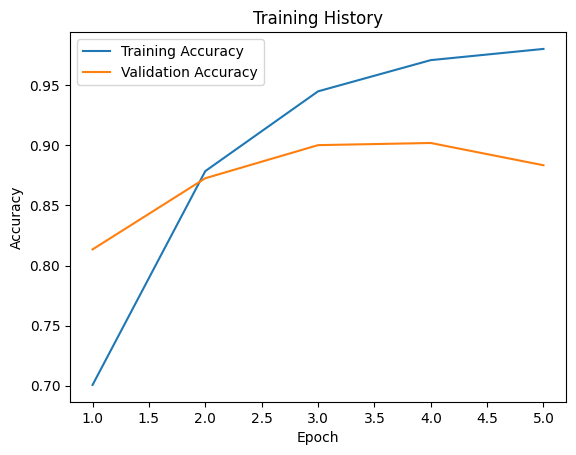

Best Epoch: 4


In [152]:

# Find the best epoch based on validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1

# Plot the training history
plt.plot(range(1, 6), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 6), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
fig.text(0.5, -1.2, 'slay', fontsize=12, ha='center')
plt.legend()
plt.show()

print(f'Best Epoch: {best_epoch}')

5. Testing the model

        5.1 Loading the best model

In [13]:
# Since best epoch is 4, we will load the model from that epoch
from keras import models

model = models.load_model('Final_model_epoch=4.h5')


        5.2 Creating a Classification Report based on the testing data

In [22]:
from sklearn.metrics import classification_report

predictions = model.predict(testing_images)
predictions = np.argmax(predictions, axis=1)

report = classification_report(testing_labels, predictions)


122/122 [==============================] - 25s 205ms/step


            5.2.1 Displaying the Classification Report

In [23]:
report = report.replace(' 0 ', ' Benign           ')
report = report.replace(' 1 ', ' Malignant-Early')
report = report.replace(' 2 ', ' Malignant-Pre  ')
report = report.replace(' 3 ', ' Malignant-Pro  ')
report = report.replace('y                           0','y         -         -       0')

list_of_lines = report.split('\n')
list_of_lines = [line for line in list_of_lines if line.strip() != '']
all_lines = []
for line in list_of_lines:
    line = line.split()
    line = [x for x in line if x != '']
    all_lines.append(line)
all_lines[0] = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
all_lines.insert(5, [' ', ' ', ' ', ' ', ' '])
all_lines[6][1:3] = ' ',' '

from tabulate import tabulate

table = tabulate(all_lines[1:], headers=all_lines[0], tablefmt='fancy_grid', numalign='center')

print('\n\n\t\t\tClassification Report\n')
print(table)



			Classification Report

╒═════════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Class           │ Precision   │ Recall   │ F1-Score   │ Support   │
╞═════════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Benign          │ 0.76        │ 0.88     │ 0.82       │ 568       │
├─────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Malignant-Early │ 0.84        │ 0.92     │ 0.88       │ 1145      │
├─────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Malignant-Pre   │ 0.96        │ 0.96     │ 0.96       │ 1194      │
├─────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Malignant-Pro   │ 0.99        │ 0.79     │ 0.88       │ 979       │
├─────────────────┼─────────────┼──────────┼────────────┼───────────┤
│                 │             │          │            │           │
├─────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy        │             │          │ 0.89       │ 3886

        5.3 Making a confusion matrix to visualise the accuracy of the model

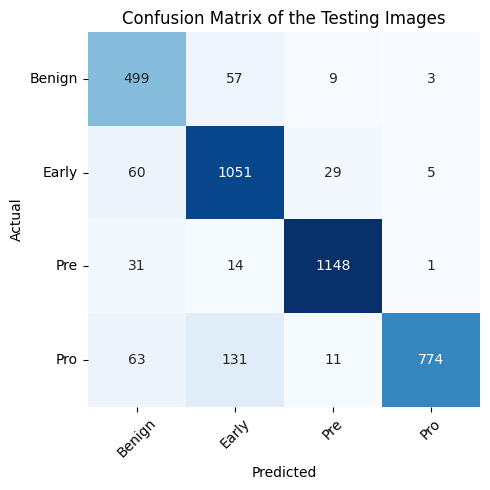

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = ['Benign', 'Early', 'Pre', 'Pro']

# plot the confusion matrix
cm = confusion_matrix(testing_labels, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Testing Images')
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)
plt.tight_layout()
plt.show()

        5.4 Displaying the actual predictions on images from testing data

1/1 [==============================] - 0s 38ms/step


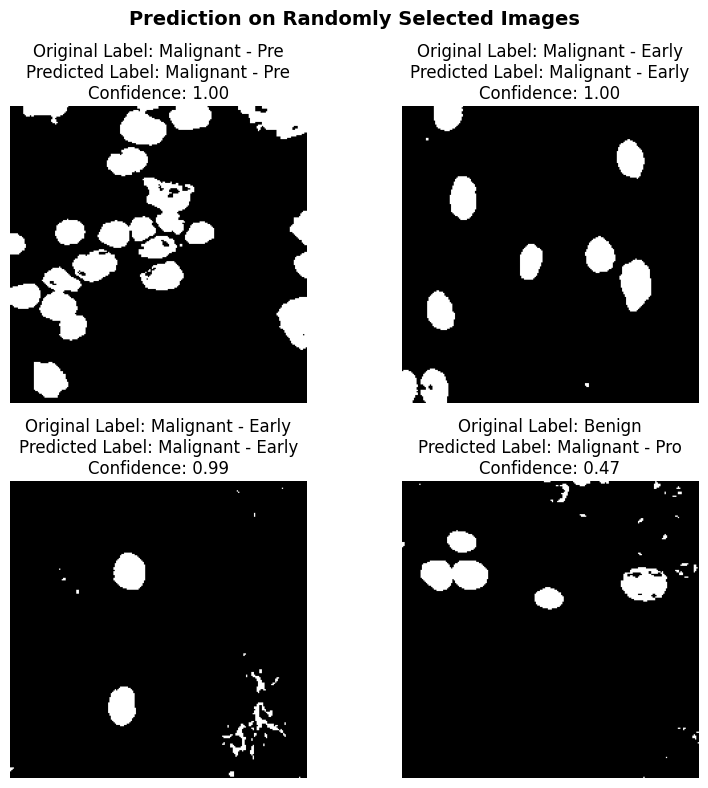

In [14]:
import random

random_indices = random.sample(range(len(testing_images)), 4)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

labels = ['Benign', 'Malignant - Early', 'Malignant - Pre', 'Malignant - Pro']

for i, ax in enumerate(axes.flat):
    image = testing_images[random_indices[i]]
    label = testing_labels[random_indices[i]]

    # Expand dimensions to match the model's input shape
    image = np.expand_dims(image, axis=0)

    # Predict the label for the image
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction, axis=1)[0]
    condidence = prediction[0][predicted_label]

    # Display the image, original label, and predicted label
    ax.imshow(image.squeeze(), cmap='gray')  # Squeeze the dimensions if necessary
    ax.set_title(f"Original Label: {labels[label]}\nPredicted Label: {labels[predicted_label]}\nConfidence: {condidence:.2f}")
    ax.axis('off')

fig.suptitle("Prediction on Randomly Selected Images", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()